<a href="https://colab.research.google.com/github/jaznamezahidalgo/ModeloSegmentacion/blob/main/SegmentacionTutoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Versión

**@autor - Jazna Meza Hidalgo**

**@versión - 2022** 



---



## Consideraciones

1. Se debe trabajar con un **archivo CSV** que contenga los resultados de la evaluación considerando los puntajes, de acuerdo a escala de valoración

2. La **cantidad de ítems**, dependerá de el detalle de la rúbrica asociada a la evaluación y debe ser definido.

3. La escala es la estándar que se maneja:

  + ED - Logro del aspecto en un 100%
  + AD - Logro del aspecto entre un 80% y un 99%
  + DA - Logro del aspecto entre un 60% y un 79%
  + DP - Logro del aspecto entre un 30% y un 59%
  + DC - Logro del aspecto inferior al 30%
  
  Cada uno de estos valores se escala de 1 a 5 

4. El archivo CSV de contar con las columnas OBLIGATORIAS:

  + ID del estudiante 
  + $I_{i}$ considerando cada ítem evaluado 

5. Considerando el archivo CSV se calculan 2 columnas: ***nota y categoría***.

6. Cálculo de la nota (en base al puntaje)

> $
nota(p) =
\begin{cases}
(n_{apr}-n_{min}) \cdot \dfrac{p}{e\cdot p_{max}} + n_{min}\text{ si } p<e\cdot p_{max} \\
\\
\\
\\
(n_{max}-n_{apr}) \cdot \dfrac{p-e\cdot p_{max}}{p_{max}\cdot(1-e)} + n_{apr} \text{    si } p \ge e\cdot p_{max}
\end{cases}
$

donde:
>+ $n_{max}$ = nota máxima
>+ $n_{min}$ = nota mínima
>+ $n_{min}$ = nota mínima
>+ $e$ = Exigencia 
>+ $p_{max}$ = puntaje máximo
>+ $p_{min}$ = puntaje mínimo
>+ $n_{aprob}$ = nota aprobación

7. Cálculo de la **categoría** se usa la función:


> $
categoria(nota)= \left\{ \begin{array}{lcc}
             1 & si  & nota \geq 6.0 \\            
             \\ 2 & si & 5.0 \leq nota \leq 5.9\\
             \\ 3 & si & 4.0 \leq nota \leq 4.9\\
             \\ 4 & si & 3.0 \leq nota \leq 3.9\\
             \\ 5 & si & nota \leq 2.9
             \end{array}
   \right.
$



8. Los candidatos a tutoría serán aquellos que estén en la **categoría 4 o 5**



---



## Características de la implementación

+ Se usa el coeficiente de la silueta (silhoutte) para evaluar resultados, el cual se calcula de acuerdo a la fórmula:

![texto del vínculo](https://miro.medium.com/max/278/1*U9FQAj-kvwW5seCH8l9BAw.png)

donde el valor de s(x) puede variar entre -1 y 1,
+ -1 si es un mal agrupamiento
+ 0 si es indiferente
+ 1 si es un buen agrupamiento

Por lo tanto, el coeficiente de la silueta para todo el agrupamiento es:

![texto del vínculo](https://miro.medium.com/max/278/1*FbyLaJ3Md2kwhZkgfI8FCQ.png)

# Definición de clases


## Clase GenerateData

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

class Generate(object):
    def __init__(self, data_config, file_output="Generate.csv") :
        self.output = file_output
        self.configuracion = data_config

    def generate(self):
        archivo = open(self.output,"w")

        for item in range(1, self.items+1):
            self.header = self.header + ";I" + str(item);
        archivo.write(self.header + "\n")

        for index in range(1, self.observaciones+1):
            line = str(index)
            for item in range(1, self.items+1):
                logro = np.random.randint(5)
                line = line + ";" + str(self.escala[logro])
        
            archivo.write(line + "\n")
        archivo.close()

    def __getattribute__(self, __name: str):
        return object.__getattribute__(self, __name)

    def generate_data(self):
        """
        Genera la data completamente aleatorizada usando la librería sklearn
        """
        X, y = make_blobs(
            n_samples    = self.configuracion.observaciones, 
            n_features   = self.configuracion.items, 
            centers = self.configuracion.clusters,
            cluster_std = 0.6,
            shuffle      = True, 
            random_state = 0
        )
        self.X = X
        self.y = y

    def calculate_grade(self, puntaje):
        """
        Calcula la nota de acuerdo a la fórmula definida
        """
        PUNTAJE_CORTE = self.configuracion.puntaje_corte
        NOTA_MAXIMA = self.configuracion.nota_maxima
        NOTA_MINIMA = self.configuracion.nota_minima
        NOTA_APROBACION = self.configuracion.nota_aprobacion
        PUNTAJE_MAXIMO = self.configuracion.puntaje_maximo
        EXIGENCIA = self.configuracion.exigencia
        if puntaje >= PUNTAJE_CORTE:
            nota = round((NOTA_MAXIMA - NOTA_APROBACION)*(puntaje-PUNTAJE_CORTE)/(PUNTAJE_MAXIMO*(1-EXIGENCIA))+NOTA_APROBACION,1)
        else: 
            nota = round((NOTA_APROBACION - NOTA_MINIMA)*(puntaje/PUNTAJE_CORTE)+NOTA_MINIMA,1)
        return nota

    def calculate_category(self, nota):
        """
        Calcula la categoría de acuerdo a lo definido en los requerimientos
        """
        if nota >= 6.0: categoria = 1
        elif nota >= 5: categoria = 2
        elif nota >= 4: categoria = 3
        elif nota >= 3: categoria = 4
        else: categoria = 5
        return categoria

    def generate_headers_items(self):
        """
        Genera las cabeceras de los ítems de evaluación de acuerdo a lo que exige el modelo
        """
        n_items = self.configuracion.items
        items_features = []
        for n_item in range(1, n_items + 1):
            items_features.append('i' + str(n_item))
        self.items_features = items_features

    def generate_headers(self):
        """
        Genera las cabezeras que debe tener la data de acuerdo a lo que exige el modelo
        """
        n_items = self.configuracion.items
        all_features = ['id']
        items_features = self.generate_headers_items()
        for n_item in range(1, n_items + 1):
            all_features.append('i' + str(n_item))
        all_features = all_features + ['puntaje','nota','categoria']
        self.all_features = all_features

    def calculate_save_from_random(self):
        """
        Genera un archivo CSV con datos completamente aleatorios usando la librería de sklearn
        """
        n_observaciones = self.configuracion.observaciones
        n_items = self.configuracion.items
        n_clusters = self.configuracion.clusters
        MAX_ESCALA = self.configuracion.escala
        self.generate_data()
        self.generate_headers()
        self.data_frame = pd.DataFrame(self.X, columns=self.items_features)
        self.data_frame = self.data_frame.apply(lambda value : round(abs(value)), axis = 1)
        for column in self.data_frame.columns:
            self.data_frame[column] = self.data_frame[column].apply(lambda value : round(np.max([value, 1.0])))
            self.data_frame[column] = self.data_frame[column].apply(lambda value : round(np.min([value, MAX_ESCALA])))
        self.data_frame['puntaje'] = self.data_frame.sum(axis=1)
        self.data_frame['nota'] = self.data_frame['puntaje'].apply(lambda row : self.calculate_grade(row))
        self.data_frame['categoria'] = self.data_frame['nota'].apply(lambda row : self.calculate_category(row))
        self.data_frame['id'] = range(1, self.X.shape[0]+1)
        self.data_frame = self.data_frame.reindex(columns=self.all_features)
        self.data_frame.to_csv(self.output, index = False)
         
    def calculate_columns(self):
        """
        Calcula las columnas puntaje y nota de acuerdo a lo que exige el modelo
        """
        self.generate_headers()
        self.data_frame[self.items_features]
        self.data_frame = self.data_frame.apply(lambda value : round(abs(value)), axis = 1)
        MAX_ESCALA = self.configuracion.escala
        for column in self.data_frame.columns:
            self.data_frame[column] = self.data_frame[column].apply(lambda value : np.max([value, 1.0]))
            self.data_frame[column] = self.data_frame[column].apply(lambda value : np.min([value, MAX_ESCALA]))
            self.data_frame['puntaje'] = self.data_frame.sum(axis=1)
            self.data_frame['nota'] = self.data_frame['puntaje'].apply(lambda row : self.calculate_grade(row))
            self.data_frame['categoria'] = self.data_frame['nota'].apply(lambda row : self.calculate_category(row))
            self.data_frame['id'] = range(1, self.X.shape[0]+1)
            self.data_frame = self.data_frame.reindex(columns=self.all_features)

## Clase ConfigurationFile

In [43]:
from configparser import ConfigParser

class ConfigurationFile(object):
    def __init__(self, str_config, modelname):
        config = ConfigParser({'N_ITEMS' : '8',                                    
                                   'ESCALA': '5',
                                   'N_OBSERVACIONES': '100',
                                   "NOTA_MAXIMA" : '7.0',
                                   "NOTA_MINIMA" : '1.0',
                                   "NOTA_APROBACION": '4.0',
                                   "EXIGENCIA" : '0.6',
                                   "CLUSTERS" : '3'
                                   })
        config.read(str_config)  
        modelname = modelname.upper()
        #print(str_config, config.sections())   
        self.items = config[modelname].getint("ITEMS")
        self.escala = config[modelname].getint("ESCALA")    
        self.observaciones = config[modelname].getint("OBSERVACIONES")        
        self.nota_maxima = config[modelname].getint("NOTA_MAXIMA")
        self.nota_minima = config[modelname].getint("NOTA_MINIMA")
        self.nota_aprobacion = config[modelname].getint("NOTA_APROBACION")
        self.exigencia = config[modelname].getfloat("EXIGENCIA")
        self.clusters = config[modelname].getint("CLUSTERS")
        self.puntaje_maximo = self.escala*self.items
        self.puntaje_corte = round(self.exigencia*self.puntaje_maximo)

    def __getattribute__(self, __name: str):
        return object.__getattribute__(self, __name)

## Clase Visualize

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

class Visualize:
    def __init__(self, data_frame) :
        self.data_frame = data_frame

    def view_histogram(self, n_items, title):
        lst_feature = []
        for n_item in range(1, n_items + 1):
            lst_feature.append('i' + str(n_item))
        fig, ax = plt.subplots(2, 4, figsize=(20, 10))
        fig.suptitle(title, fontsize=28)
        row, col = 0, 0
        for feature in lst_feature:  
            sns.histplot(self.data_frame[feature], ax=ax[row][col], kde=True) 
            col += 1
            row += 0 if col < 4 else 1
            col = 0 if col > 3 else col
        plt.show()

    def view_histogram_by_column(self, column, title):
        try:
            sns.set(style='whitegrid')
            f, ax = plt.subplots(1,1, figsize=(6, 4))
            ax = sns.histplot(self.data_frame[column], kde = True, color = 'c')
            plt.title(title, fontsize = 18, fontweight="bold")
            plt.xlabel(column.capitalize())
            plt.ylabel("Densidad")
            plt.show();
        except KeyError:
            print("Problema para visualizar gráfico")  

    def count_by_column(self, column):
        return self.data_frame.groupby(column).size()

    def view_outliers(self, column, title):
        ax = sns.boxplot(y=column, data=self.data_frame)
        plt.suptitle(title, fontsize = 18, fontweight="bold");  

    def view_items(self, n_items, title):
        lst_feature = []
        for n_item in range(1, n_items + 1):
            lst_feature.append('i' + str(n_item))
        fig, ax = plt.subplots(2, 4, figsize=(20, 10))
        fig.suptitle(title, fontsize=28)
        row, col = 0, 0
        for feature in lst_feature:  
            sns.boxplot(y=self.data_frame[feature], ax=ax[row][col], 
                data=self.data_frame, color="r")
            col += 1
            row += 0 if col < 4 else 1
            col = 0 if col > 3 else col
        plt.show()  

    def view_distribution(self, hue, features):
        sns.pairplot(self.data_frame, hue=hue, height=4, vars=features, kind='scatter');

## Clase Load

In [53]:
import pandas as pd
import numpy as np
class Load:
    def __init__(self, source_file):
        self.source = source_file

    def createDF(self, sep=";"):
        self.data_frame = pd.read_csv(self.source, sep=sep)
        return self.data_frame

    def getFeatures(self, exclude=["id"]):
        return self.data_frame.columns.drop(exclude)

    def getData(self):
        return np.array(self.data_frame[self.getFeatures()])

## Clase Data

In [106]:
class Data(object):
  def __init__(self, data, column, limit):
      self.data = data
      self.query = "{0} >= {1}".format(column, limit) 
      self.selected = self.data.query(self.query)

  def __getattr__(self, name: str):
      return object.__getattribute__(name)

  def __setattr__(self, name: str, value):
      self.__dict__[name] = value  

  def get_metrics_by_columns(self, columns, include="selected"):
    if include == "all":
      return self.data.groupby('categoria')[columns].describe()    
    return self.selected.groupby('categoria')[columns].describe()

  def scale_data(self, n_items):
    data_selected = self.selected
    items_features = []
    for n_item in range(1, n_items + 1):
      items_features.append('i' + str(n_item))  
    exclude = data_selected.columns.difference(items_features)
    X_features = np.array(data_selected[data_selected.columns.drop(exclude)])  
    scaler = StandardScaler()
    X_features_scaled = scaler.fit_transform(X_features)
    return X_features_scaled

## Clase PCA_Work

In [118]:
class PCA_Work(object):
  def __init__(self, features_scaled):
      self.X_features_scaled = features_scaled
      self.num_pca = 1      

  def __getattr__(self, name: str):
      return object.__getattribute__(name)

  def __setattr__(self, name: str, value):
      self.__dict__[name] = value  

  def plotting_variances(self):
    # Plotting the variances for each PC
    pca = PCA()
    principal_components = pca.fit_transform(self.X_features_scaled)
    PC = range(1, pca.n_components_+1)
    plt.bar(PC, pca.explained_variance_ratio_, color='blue')
    plt.xlabel('Componentes principales')
    plt.ylabel('Varianza %')
    plt.xticks(PC)
    plt.title("Varianza utilizando varios componentes", fontsize=18, fontweight="bold")

    # Putting components in a dataframe for later
    self.PCA_components = pd.DataFrame(principal_components)    

  def cluster_by_PCA(self, max_clusters = 10, max_iter = 1000, 
                     kmeans_init = None):
    p_init = 'k-means++' if kmeans_init is None else kmeans_init
    inertias = []

    # Creating 10 K-Mean models while varying the number of clusters (k)
    for k in range(2,max_clusters + 1):
      model = KMeans(n_clusters=k, max_iter = max_iter,  init = p_init, random_state = 29)
    
      # Fit model to samples
      model.fit(self.PCA_components.iloc[:,:self.num_pca])
    
      # Append the inertia to the list of inertias
      inertias.append(model.inertia_)
    
    plt.plot(range(2,max_clusters+1), inertias, '-p', color='red')
    plt.xlabel('Número de cluster, k', fontsize=14)
    plt.ylabel('inercia', fontsize=14)
    plt.title('Variación de inercias usando PCA {0} y K-MEANS {1}'.format(self.num_pca, 
                                                                          p_init), 
              fontweight="bold")
    plt.show()  

  def group_by_PCA(self, n_clusters, max_iter = 1000, kmeans_init = None):
    kmeans_init = 'k-means++' if kmeans_init is None else kmeans_init
    model = KMeans(n_clusters=n_clusters, max_iter = max_iter, init = kmeans_init, random_state = 29)
    model.fit(self.PCA_components.iloc[:,:self.num_pca])
    fig, ax = plt.subplots(figsize=(8,8))
    labels = model.predict(self.PCA_components.iloc[:,:self.num_pca])
    scatter = ax.scatter(self.PCA_components[0], self.PCA_components[1], c=labels, cmap="Dark2_r", s=100, alpha=0.9)
    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Grupos")
    ax.add_artist(legend1)
    plt.title("Agrupación con reducción dimensional con K-MEANS {}".format(kmeans_init),fontsize=28, fontweight="bold")
    plt.show()
    self.labels = labels

  def get_data_final(self, data_selected, labels):
    self.data_final = data_selected.copy()
    self.data_final['grupo'] = self.labels
    

## Clase SearchOptimusK

In [152]:
class SearchOptimusK(object):
  def __init__(self, num_pca, PCA_components, max_clusters = 10, 
               max_iter = 1000, algorithm = None, kmeans_init = None):
      self.num_pca = num_pca
      self.PCA_components = PCA_components
      self.max_clusters = max_clusters
      self.max_iter = max_iter
      self.algorithm = "auto" if algorithm is None else algorithm
      self.kmeans_init= "k-means++" if kmeans_init is None else kmeans_init      

  def __getattr__(self, name: str):
      return object.__getattribute__(name)

  def __setattr__(self, name: str, value):
      self.__dict__[name] = value  

  def get_cluster_elbow(self):
    """
    Método curva de elbow para identificar el número óptimo de clusters
    """    
    num_clusters = range(2, self.max_clusters+1)
    
    models = [KMeans(n_clusters=i, max_iter = self.max_iter, random_state=29, 
                     algorithm=self.algorithm, init = self.kmeans_init) for i in num_clusters]
    score = [models[i].fit(self.PCA_components.iloc[:,:self.num_pca]).score(self.PCA_components.iloc[:,:self.num_pca]) for i in range(len(models))] 
    y_predict = [models[i].predict(self.PCA_components.iloc[:,:self.num_pca]) for i in range(len(models))]
    inercias = [models[i].inertia_ for i in range(len(models))] 

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(num_clusters, inercias, marker='o')
    ax[0].set_title("Evolución de la varianza intra-cluster total", fontsize=18, fontweight="bold")
    ax[0].set_xlabel('Número clusters', fontsize=14)
    ax[0].set_ylabel('Intra-cluster (inertia)', fontsize=14);

    ax[1].plot(num_clusters,score)
    ax[1].grid(color='r', linestyle='dotted', linewidth=1)
    ax[1].set_title("Evolución del score total", fontsize = 18, fontweight="bold")
    ax[1].set_xlabel('Número de Clusters', fontsize=14)
    ax[1].set_ylabel('Score', fontsize=14)

    plt.show()

  def get_cluster_silhoutte(self):
    """
    Método silhouette para identificar el número óptimo de clusters
    """
    self.range_n_clusters = range(2, self.max_clusters+1)
    self.valores_medios_silhouette = []
    for n_clusters in self.range_n_clusters:
      modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        max_iter = self.max_iter,
                        random_state = 29, 
                        algorithm = self.algorithm, init = self.kmeans_init
                    )
      cluster_labels = modelo_kmeans.fit_predict(self.PCA_components.iloc[:,:self.num_pca])
      silhouette_avg = silhouette_score(self.PCA_components.iloc[:,:self.num_pca], cluster_labels, metric="sqeuclidean")
      self.valores_medios_silhouette.append(silhouette_avg)
    self.ideal_number = list(range(2,self.max_clusters+1))[np.argmax(self.valores_medios_silhouette)]
    #self_values_medios_silhoutte = self.valores_medios_silhouette  
    return self.ideal_number, self.valores_medios_silhouette, self.range_n_clusters    

  def graphic_view(self):  
    fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
    ax.plot(self.range_n_clusters, self.valores_medios_silhouette, marker='o')
    ax.set_title("Evolución de media de los índices silhouette con {}".format(self.algorithm), fontsize=18, fontweight="bold")
    ax.set_xlabel('Número clusters', fontsize=14)
    ax.set_ylabel('Media índices silhouette', fontsize=14);

  def get_cluster_GAP(self, nrefs=3, maxClusters=10):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    data = self.PCA_components.iloc[:,:self.num_pca]
    gaps = np.zeros((len(range(2, maxClusters+1)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(2, maxClusters+1)):
      # Holder for reference dispersion results
      refDisps = np.zeros(nrefs)
      # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
      for i in range(nrefs):      
        # Create new random reference set
        randomReference = np.random.random_sample(size=data.shape)
        # Fit to it
        km = KMeans(k, init = self.kmeans_init, max_iter = self.max_iter, random_state=29)
        km.fit(randomReference)
        refDisp = km.inertia_
        refDisps[i] = refDisp
        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf, resultsdf.clusterCount[gaps.argmax()])


## Clase SegmentationModel

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
class SegmentationModel(object):
  def __init__(self, X, x_clusters, n_pca, x_iterations = 1000, name = "KMeans"):
    self.X = X
    
    self.n_clusters = x_clusters
    self.num_pca = n_pca
    self.max_iter = x_iterations
    self.dict_summary = {}
    self.name = name
    # Crea el modelo
    self.model = KMeans(n_clusters = self.n_clusters, max_iter = self.max_iter, 
                           random_state=29, init='random',
                       algorithm = 'auto').fit(X=X.iloc[:,:self.num_pca])
    self.y_predict = self.model.predict(self.X.iloc[:,:self.num_pca])

    self.dict_summary[name] = {}
    self.dict_summary[name]['inertia'] = self.model.inertia_
    self.dict_summary[name]['n_features_in'] = self.model.n_features_in_
    self.dict_summary[name]['init'] = self.model.init
    self.dict_summary[name]['clusters'] = self.model.n_clusters
    self.dict_summary[name]['model'] = self.model
  
  def view_graphic(self):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    ax.scatter(
        x = self.X[0],
        y = self.X[1], 
        c = self.y_predict,
        marker    = 'o',
        edgecolor = 'black'
    )
    ax.set_title('KMeans K={0}, PCA={1}'.format(self.n_clusters, self.num_pca), fontsize=20, fontweight="bold");

  def __getattr__(self, name: str):
      return object.__getattribute__(name)
    
  def __setattr__(self, name: str, value):
      self.__dict__[name] = value

# Funcionamiento

## Carga de librerías

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, StandardScaler

from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.decomposition import PCA

import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from scipy.stats import norm

import os

## Carga parámetros de configuración

In [15]:
%cd /content

/content


In [44]:
# Lee archivo de configuración
configurationFile = ConfigurationFile("/content/config/model.config", "generate")

In [48]:
# Ver los parámetros con los que va a trabajar el modelo
print("NOTA MÁXIMA : {}".format(configurationFile.nota_maxima))
print("NOTA MÍNIMA : {}".format(configurationFile.nota_minima))
print("CLUSTERS : {}".format(configurationFile.clusters))
print("ESCALA : {}".format(configurationFile.escala))
print("EXIGENCIA : {}".format(configurationFile.exigencia))
print("ITEMS : {}".format(configurationFile.items))
print("OBSERVACIONES : {}".format(configurationFile.observaciones))
print("NOTA APROBACIÓN : {}".format(configurationFile.nota_aprobacion))
print("PUNTAJE CORTE : {}".format(configurationFile.puntaje_corte))
print("PUNTAJE MÁXIMO : {}".format(configurationFile.puntaje_maximo))

NOTA MÁXIMA : 7
NOTA MÍNIMA : 1
CLUSTERS : 5
ESCALA : 5
EXIGENCIA : 0.6
ITEMS : 8
OBSERVACIONES : 150
NOTA APROBACIÓN : 4
PUNTAJE CORTE : 24
PUNTAJE MÁXIMO : 40


## Configuración carpetas de data

In [5]:
CURRENT_DIR = os.getcwd() # Retrieve current directory
DATA_DIR = os.path.join(CURRENT_DIR, "data") 
if not os.path.isdir(DATA_DIR):
  os.mkdir(os.path.join(CURRENT_DIR, "data"))
os.chdir(DATA_DIR)
!pwd

/content/data


## Obtención de data

### Cargar data archivo CSV (generados a través de esta misma aplicación)

Acá se cargan archivos que tengo en mi repositorio

In [6]:
!wget https://www.dropbox.com/s/3rgq7lu6hivjnue/Simulation_data.csv
!wget https://www.dropbox.com/s/tupkzbyxedh2q29/Simulate_Data_01.csv
!ls

--2022-02-17 23:35:35--  https://www.dropbox.com/s/3rgq7lu6hivjnue/Simulation_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3rgq7lu6hivjnue/Simulation_data.csv [following]
--2022-02-17 23:35:35--  https://www.dropbox.com/s/raw/3rgq7lu6hivjnue/Simulation_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca67b6f21e4bde350145a79ab3a.dl.dropboxusercontent.com/cd/0/inline/Bf62R6cNXbVWkSerICVvQXRSHBqIkhLX6QRdZd_cBijVKtZ7lGNsVjwonCKBeCmTlX7e9z13eUEMi9ddLmowp3lnpa7F4NvSva3WxyVjF_r1xzoeaCpv3XJeRH980Ma1TRVBkSgD609RIUkoiZ7tatej/file# [following]
--2022-02-17 23:35:36--  https://uca67b6f21e4bde350145a79ab3a.dl.dropboxusercontent.com/cd/0/inline/Bf62R6cNXbVWkSerICVvQXRSHBqIkhLX6QRdZd_cBijVKtZ7lGNsVjwonCKBeCmTlX7e9

### Generar data aleatoria

In [9]:
%cd /content
!python main.py -config=config/model.config -mode=run

/content
run config/model.config
Traceback (most recent call last):
  File "main.py", line 28, in <module>
    configurationFile = ConfigurationFile(pargs.config, pargs.name)   
NameError: name 'ConfigurationFile' is not defined


In [58]:
# Se cambia de directorio para guardar la data en la carpeta correcta
os.chdir(DATA_DIR)
# Genera los datos
output_file = "Simulated_data_01.csv"
data_generate = Generate(configurationFile,file_output=output_file)
print("Comenzando a generar los datos en archivo", data_generate.output)
        
data_generate.calculate_save_from_random()
print("Datos generados en el archivo:", output_file)


Comenzando a generar los datos en archivo Simulated_data_01.csv
Datos generados en el archivo: Simulated_data_01.csv


### Cargar data de archivo CSV

In [59]:
output_file = "Simulated_data_01.csv"
data_load = Load(output_file)
data_frame = data_load.createDF(sep=",")
data_frame

,id,i1,i2,i3,i4,i5,i6,i7,i8,puntaje,nota,categoria
0,1,1,4,2,2,2,3,2,5,21,3.6,4
1,2,1,4,2,1,2,3,2,5,20,3.5,4
2,3,1,1,5,3,2,2,5,3,22,3.8,4
3,4,5,3,5,5,1,2,5,5,31,5.3,2
4,5,1,1,5,2,3,3,5,3,23,3.9,4
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,5,5,5,5,5,5,1,5,36,6.2,1
146,147,1,2,5,3,3,3,5,4,26,4.4,3
147,148,1,4,2,1,2,3,1,5,19,3.4,4
148,149,5,3,5,5,1,2,5,5,31,5.3,2


## Análisis explotario

### Revisión distribuciones

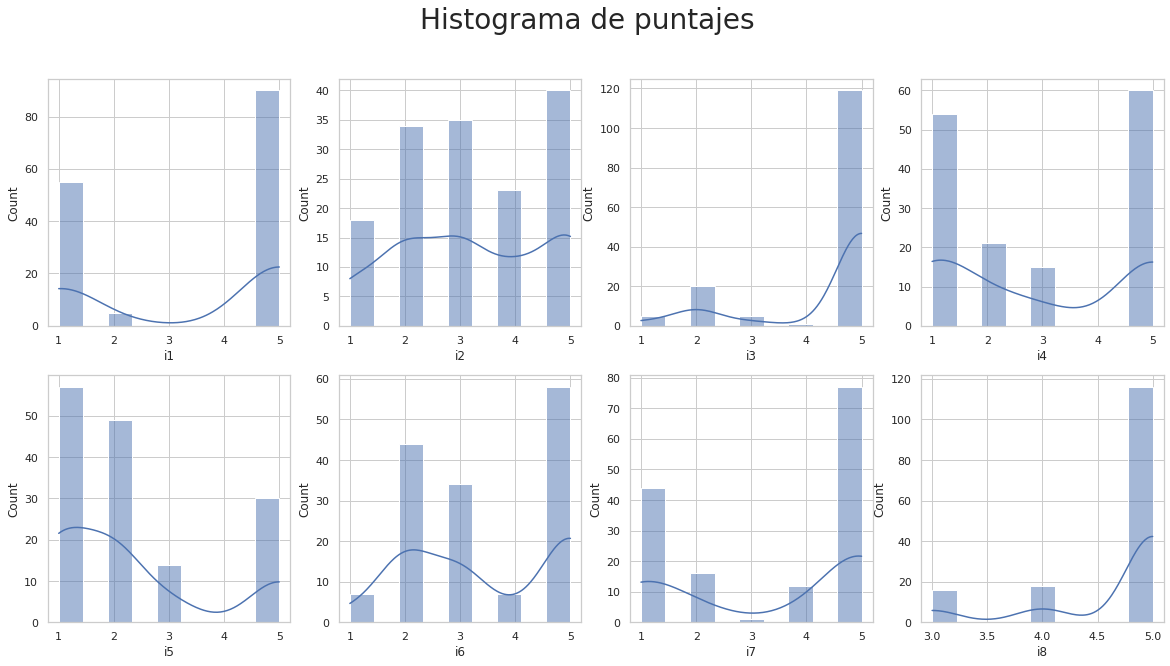

In [88]:
visual = Visualize(data_frame)
visual.view_histogram(configurationFile.items, "Histograma de puntajes")

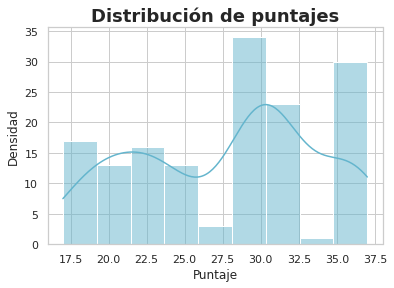

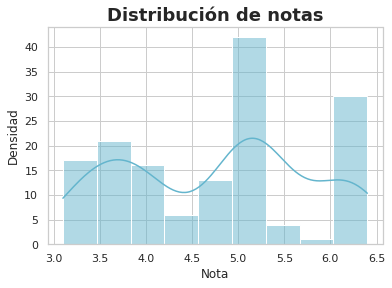

In [73]:
visual.view_histogram_by_column('puntaje', 'Distribución de puntajes')
visual.view_histogram_by_column('nota','Distribución de notas')

### Revisión outliers

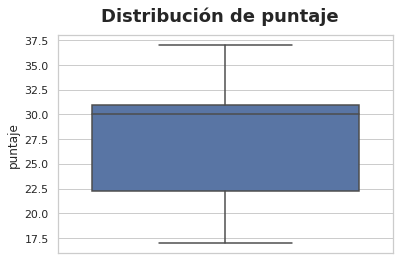

In [89]:
visual.view_outliers('puntaje', "Distribución de puntaje")

## Selección de candidatos a tutoría

### Obtención

In [108]:
data_students = Data(data_frame, "categoria", 4)
data_selected = data_students.selected
data_selected.shape

(46, 12)

### Visualizaciones

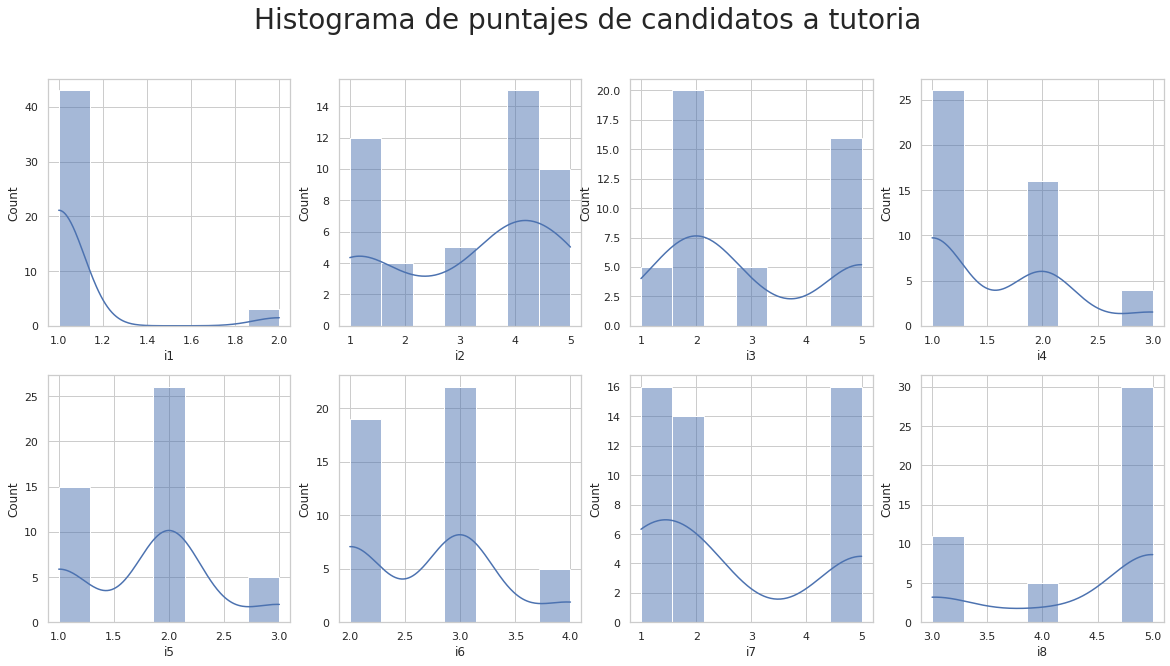

In [97]:
visual = Visualize(data_selected)
visual.view_histogram(configurationFile.items, 
                      "Histograma de puntajes de candidatos a tutoria")

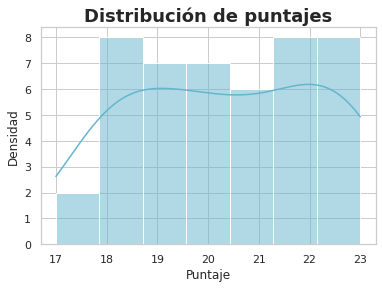

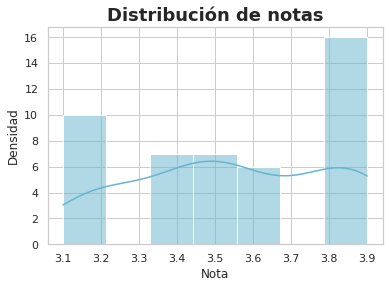

In [98]:
# Histogramas de puntaje y nota
visual.view_histogram_by_column('puntaje', 'Distribución de puntajes')
visual.view_histogram_by_column('nota','Distribución de notas')

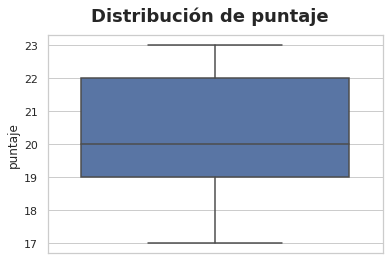

In [92]:
visual.view_outliers('puntaje', "Distribución de puntaje")

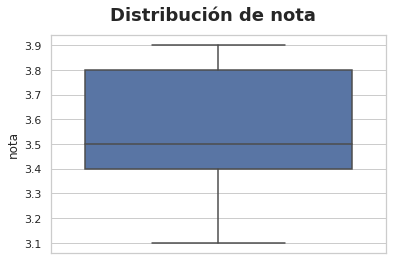

In [93]:
visual.view_outliers('nota', "Distribución de nota")

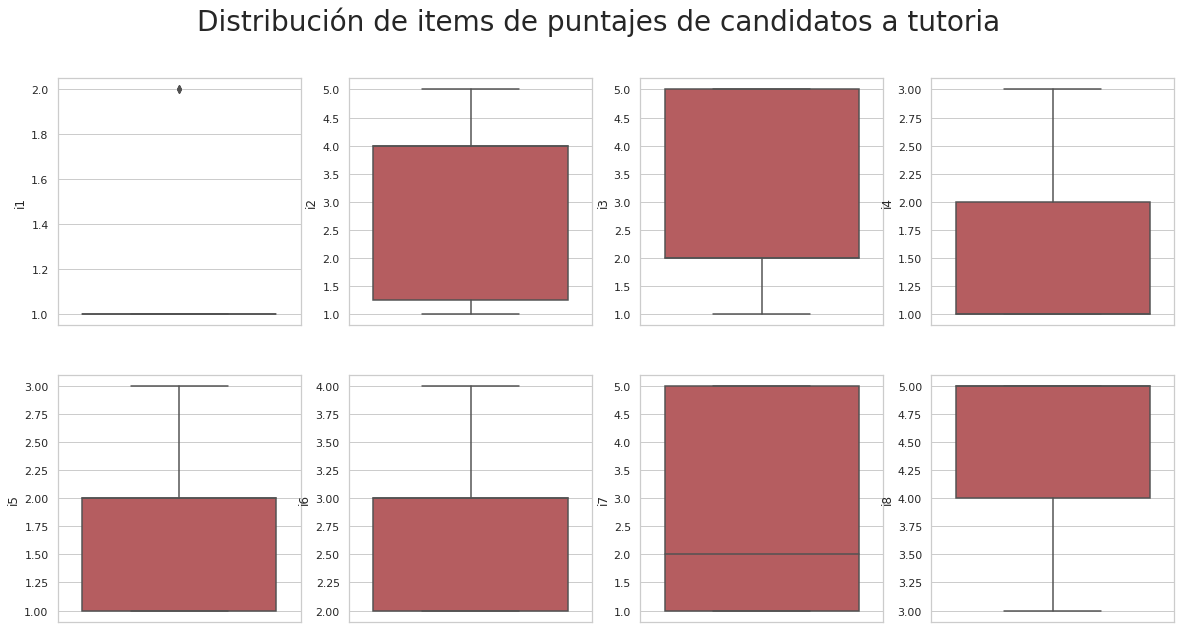

In [95]:
visual.view_items(configurationFile.items,
                  "Distribución de items de puntajes de candidatos a tutoria")

In [103]:
data_students.get_metrics_by_columns(['puntaje','nota'])

puntaje                                   ... nota                    
            count       mean       std   min   25%  ...  min  25%  50%  75%  max
categoria                                           ...                         
4            46.0  20.369565  1.889841  17.0  19.0  ...  3.1  3.4  3.5  3.8  3.9

[1 rows x 16 columns]

In [105]:
data_students.get_metrics_by_columns(['puntaje','nota'], include="all")

puntaje                                   ... nota                    
            count       mean       std   min   25%  ...  min  25%  50%  75%  max
categoria                                           ...                         
1            30.0  35.900000  0.402578  35.0  36.0  ...  6.1  6.2  6.2  6.2  6.4
2            47.0  30.638298  0.735011  30.0  30.0  ...  5.1  5.1  5.3  5.3  5.7
3            27.0  26.592593  2.274596  24.0  24.0  ...  4.0  4.0  4.4  4.9  4.9
4            46.0  20.369565  1.889841  17.0  19.0  ...  3.1  3.4  3.5  3.8  3.9

[4 rows x 16 columns]

## Tratamiento de datos

### Escalado

In [109]:
X_features_scaled = data_students.scale_data(configurationFile.items)
print(X_features_scaled.shape)

(46, 8)


### Reducción de la dimensionalidad

El $\textbf{método de componentes principales}$ se usa para explicar la estructura de varianza-covarianzas de una muestra a partir
de unas pocas combinaciones lineales de las variables originales, denominadas $\textit{componentes principales}$

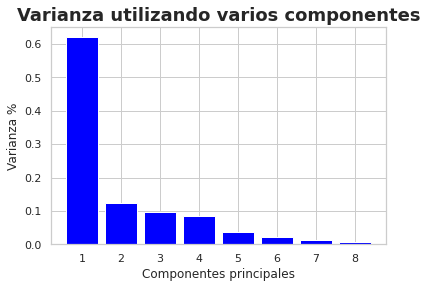

In [167]:
work_pca = PCA_Work(X_features_scaled)
work_pca.plotting_variances()

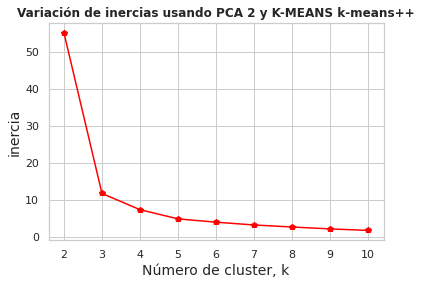

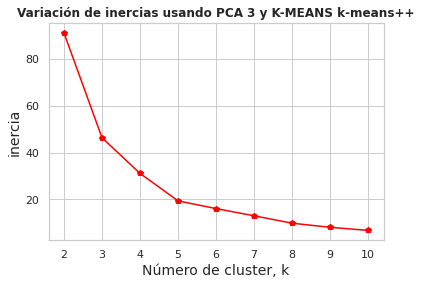

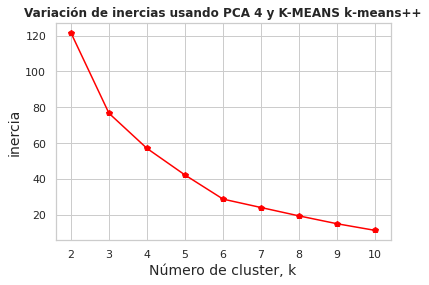

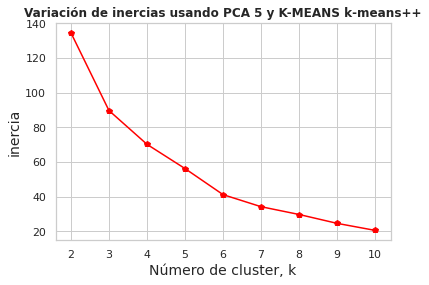

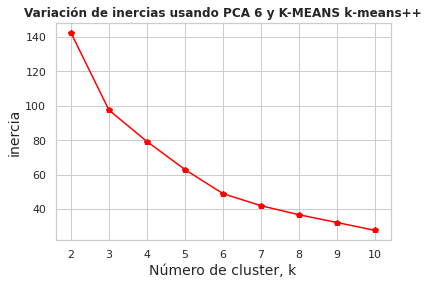

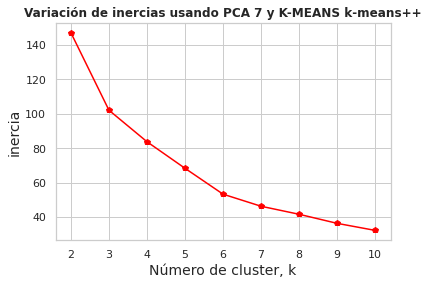

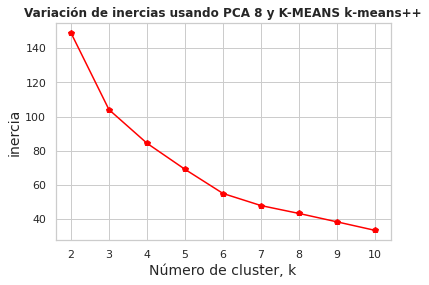

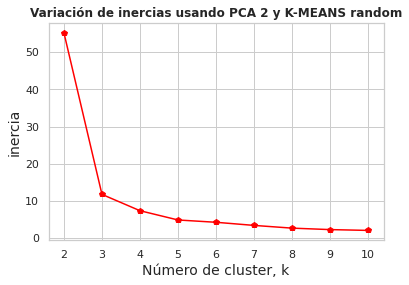

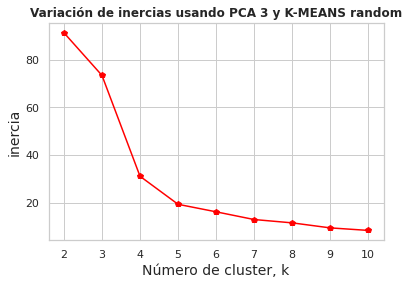

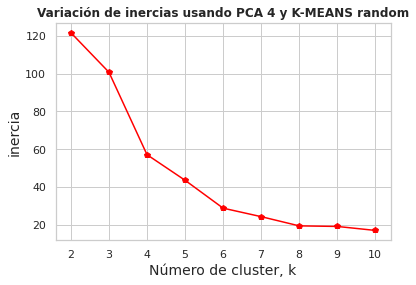

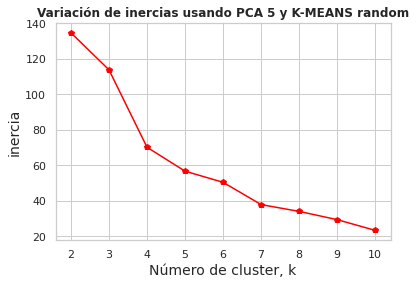

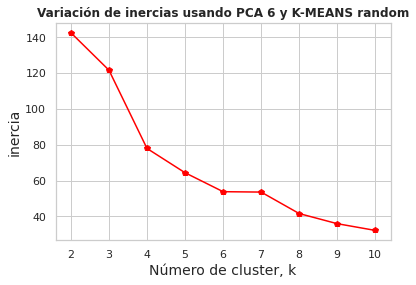

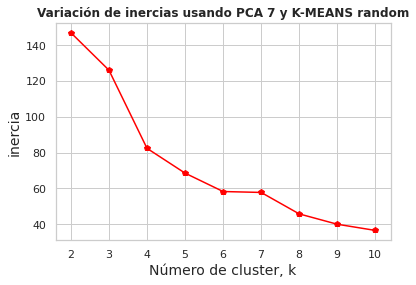

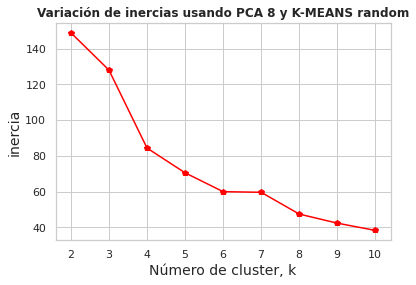

In [168]:
lst_num_features = range(2, configurationFile.items+1)
for x_init in ['k-means++', 'random']:
  for num_features in lst_num_features:
    work_pca.num_pca = num_features
    #print(work_pca.num_pca)
    work_pca.cluster_by_PCA(max_clusters = 10, kmeans_init = x_init);

In [169]:
NUM_COMPONENTS_PCA = 2
IDEAL_NUMBER_CLUSTER_BY = {}
work_pca.num_pca = 2

## Obtención número óptimo clusters

In [170]:
optimus = SearchOptimusK(work_pca.num_pca, work_pca.PCA_components)

### Curva elbow

Algoritmo auto


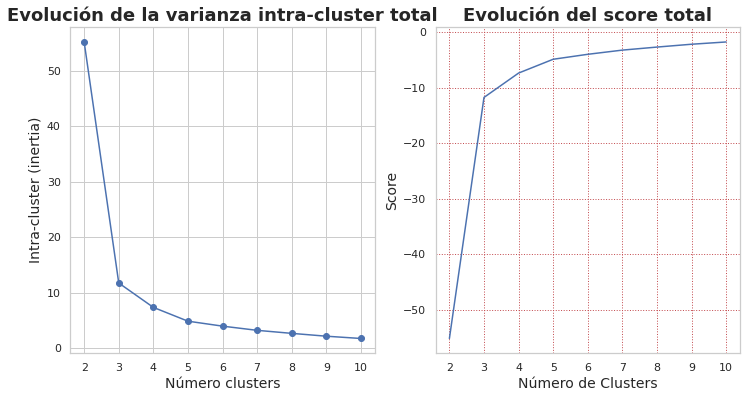

Algoritmo elkan


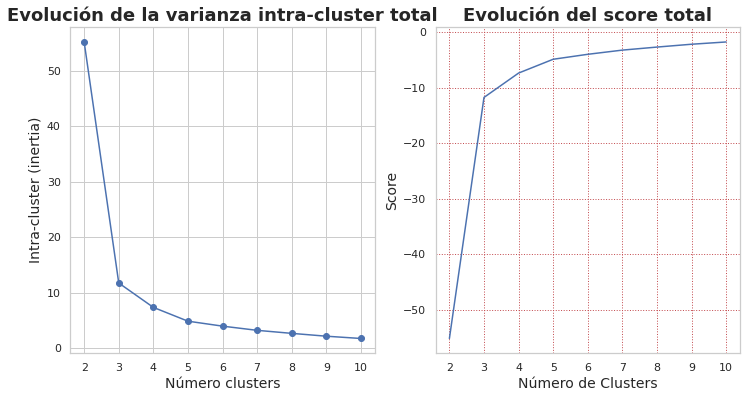

In [171]:
for alg in ['auto', 'elkan']:
  print("Algoritmo {}".format(alg))
  optimus.get_cluster_elbow()

In [172]:
IDEAL_NUMBER_CLUSTER_BY['elbow'] = 3

### Método de la silueta

Cluster ideal, usando índices silhouette con algoritmo auto es 3
Cluster ideal, usando índices silhouette con algoritmo elkan es 3


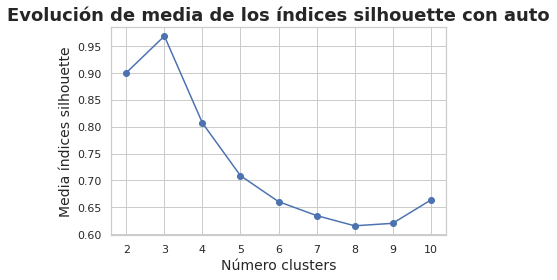

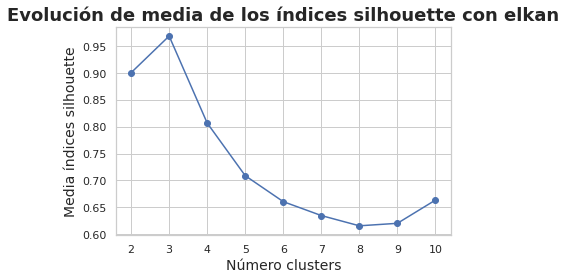

In [173]:
for alg in ['auto', 'elkan']:
  optimus = SearchOptimusK(work_pca.num_pca, work_pca.PCA_components, algorithm = alg)
  ideal_number, values, rc = optimus.get_cluster_silhoutte()
  print("Cluster ideal, usando índices silhouette con algoritmo {0} es {1}".format(alg, ideal_number))
  optimus.graphic_view()
IDEAL_NUMBER_CLUSTER_BY['silhoutte'] = ideal_number

### Estadístico GAP

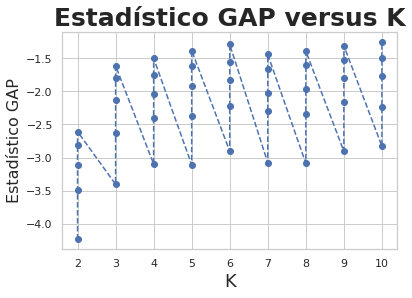

In [174]:
optimus = SearchOptimusK(work_pca.num_pca, work_pca.PCA_components, algorithm = 'random')
score_g, df, ideal_cluster_GAP = optimus.get_cluster_GAP(nrefs=5, maxClusters=10)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K', fontsize=18);
plt.ylabel('Estadístico GAP', fontsize=16);
plt.title('Estadístico GAP versus K', fontsize=25, fontweight="bold");
IDEAL_NUMBER_CLUSTER_BY['gap'] = ideal_cluster_GAP

### Decisión final

In [175]:
IDEAL_NUMBER_CLUSTER_BY

{'elbow': 3, 'gap': 3.0, 'silhoutte': 3}

## Generación del modelo

In [176]:
print("Características a considerar : {}".format(work_pca.num_pca))

Características a considerar : 2


In [177]:
dict_summary = {}
NUM_CLUSTERS = 3

### Variante 1

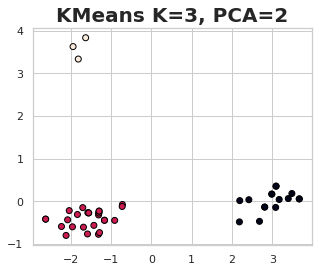

In [178]:
model_kx = SegmentationModel(work_pca.PCA_components, NUM_CLUSTERS, work_pca.num_pca)
model_kx.view_graphic()

In [179]:
df_summary = pd.DataFrame(model_kx.dict_summary).T
df_summary

,clusters,inertia,init,model,n_features_in
KMeans,3,11.750853,random,"KMeans(init='random', max_iter=1000, n_cluster...",2


### Variante 2

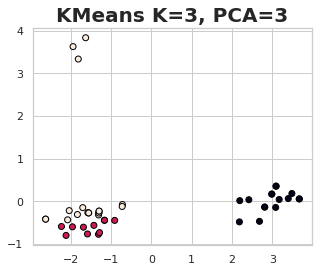

In [185]:
model_ky = SegmentationModel(work_pca.PCA_components, NUM_CLUSTERS, work_pca.num_pca+1, name="KMeans-1")
model_ky.view_graphic()

In [186]:
df_summary = df_summary.append(pd.DataFrame(model_ky.dict_summary).T)
df_summary

,clusters,inertia,init,model,n_features_in
KMeans,3,11.750853,random,"KMeans(init='random', max_iter=1000, n_cluster...",2
KMeans-1,3,73.391029,random,"KMeans(init='random', max_iter=1000, n_cluster...",3


### Variante 3

,clusters,inertia,init,model,n_features_in
KMeans,3,11.750853,random,"KMeans(init='random', max_iter=1000, n_cluster...",2
KMeans-1,3,73.391029,random,"KMeans(init='random', max_iter=1000, n_cluster...",3
KMeans-2,3,100.709153,random,"KMeans(init='random', max_iter=1000, n_cluster...",4


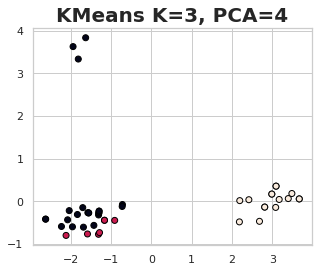

In [188]:
model_kz = SegmentationModel(work_pca.PCA_components, NUM_CLUSTERS, work_pca.num_pca+2, name="KMeans-2")
model_kz.view_graphic()
df_summary = df_summary.append(pd.DataFrame(model_kz.dict_summary).T)
df_summary

## Evaluación usando el coeficiente de Silhouette

In [189]:
def evaluate_with_silhoutte(w_pca, model):
  score = silhouette_score(w_pca.PCA_components.iloc[:,:w_pca.num_pca], 
                           model.y_predict, metric="sqeuclidean")
  print(f"Silhouette Coefficient: {score:.3f} with{model.n_clusters:3d} clusters")
  score = silhouette_score(w_pca.PCA_components.iloc[:,:w_pca.num_pca], model.y_predict)
  print(f"Silhouette Coefficient (metric -> euclidian): {score:.3f} with{model.n_clusters:3d} clusters")

In [191]:
evaluate_with_silhoutte(work_pca, model_kx)
print("*"*50)
evaluate_with_silhoutte(work_pca, model_ky)
print("*"*50)
evaluate_with_silhoutte(work_pca, model_kz)

Silhouette Coefficient: 0.969 with  3 clusters
Silhouette Coefficient (metric -> euclidian): 0.848 with  3 clusters
**************************************************
Silhouette Coefficient: 0.281 with  3 clusters
Silhouette Coefficient (metric -> euclidian): 0.295 with  3 clusters
**************************************************
Silhouette Coefficient: 0.143 with  3 clusters
Silhouette Coefficient (metric -> euclidian): 0.226 with  3 clusters


## Comparación de modelos

In [192]:
def display_variants(w_pca, n_max_clusters, max_iter = 1000, kmeans_init = None):
  range_n_clusters = range(2, n_max_clusters+1)
  kmeans_init = 'k-means++' if kmeans_init is None else kmeans_init
  for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(w_pca.PCA_components.iloc[:,:w_pca.num_pca]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, max_iter = max_iter, init = kmeans_init, random_state=29)
    cluster_labels = clusterer.fit_predict(w_pca.PCA_components.iloc[:,:w_pca.num_pca])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(w_pca.PCA_components.iloc[:,:w_pca.num_pca], cluster_labels, 
                                      metric="sqeuclidean")
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(w_pca.PCA_components.iloc[:,:w_pca.num_pca], cluster_labels, 
                                                  metric="sqeuclidean")

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        w_pca.PCA_components[0], w_pca.PCA_components[1], marker=".", s=30, lw=0, alpha=0.7, 
        c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

  plt.show()

For n_clusters = 2 The average silhouette_score is : 0.9003971803525429
For n_clusters = 3 The average silhouette_score is : 0.9686780831231749
For n_clusters = 4 The average silhouette_score is : 0.8068453806807988
For n_clusters = 5 The average silhouette_score is : 0.7088267288932542
For n_clusters = 6 The average silhouette_score is : 0.686760539588541
For n_clusters = 7 The average silhouette_score is : 0.5210997717298939
For n_clusters = 8 The average silhouette_score is : 0.6133801560207711
For n_clusters = 9 The average silhouette_score is : 0.5824031545103489
For n_clusters = 10 The average silhouette_score is : 0.5297060904890223


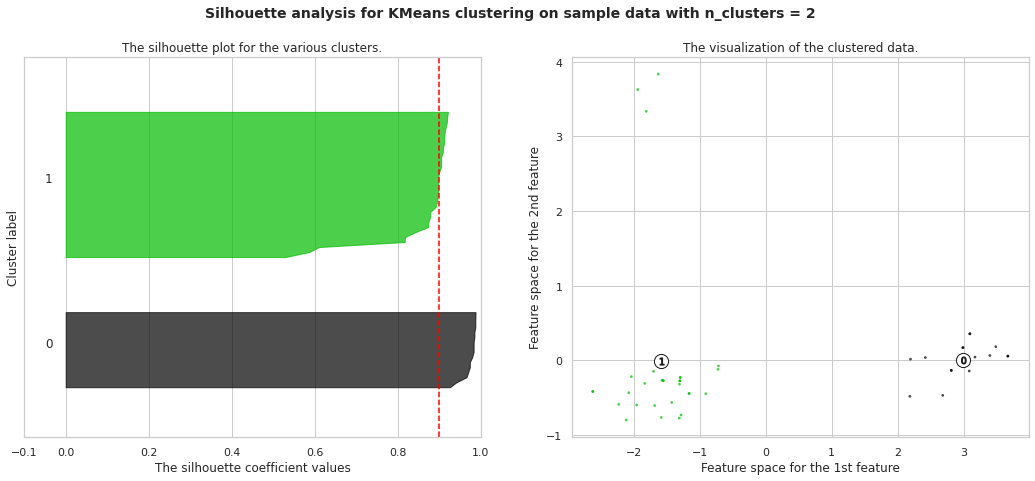

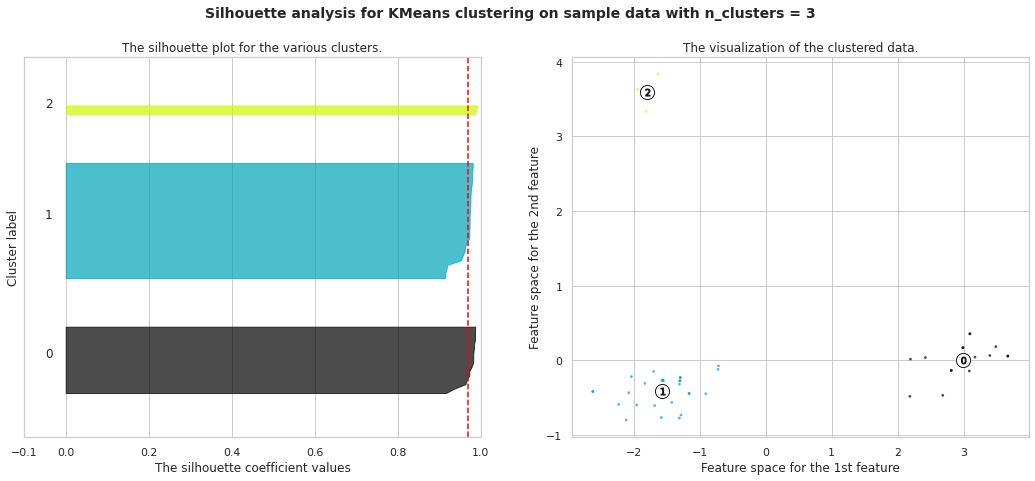

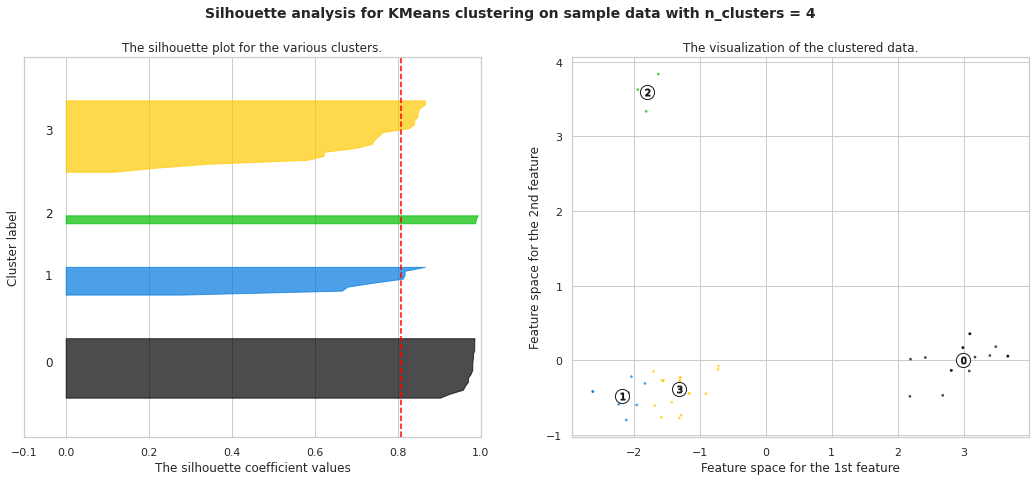

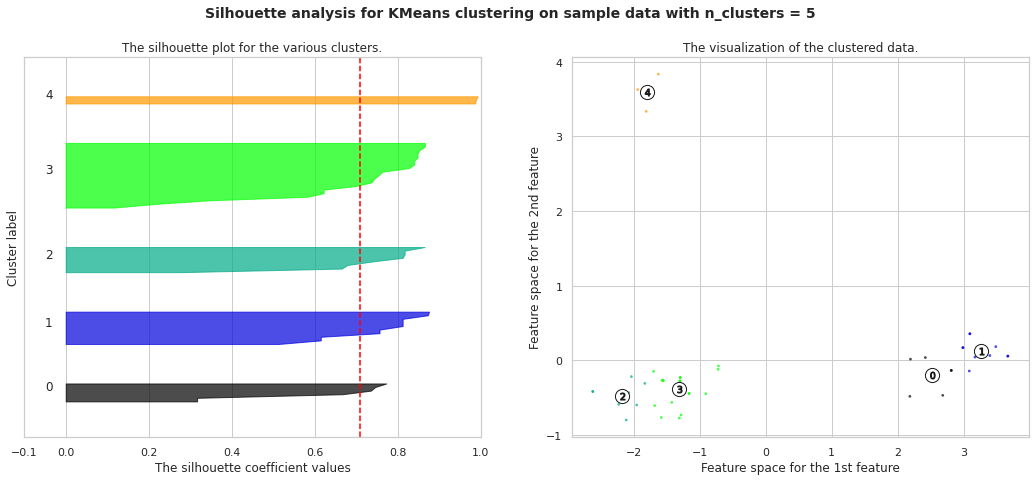

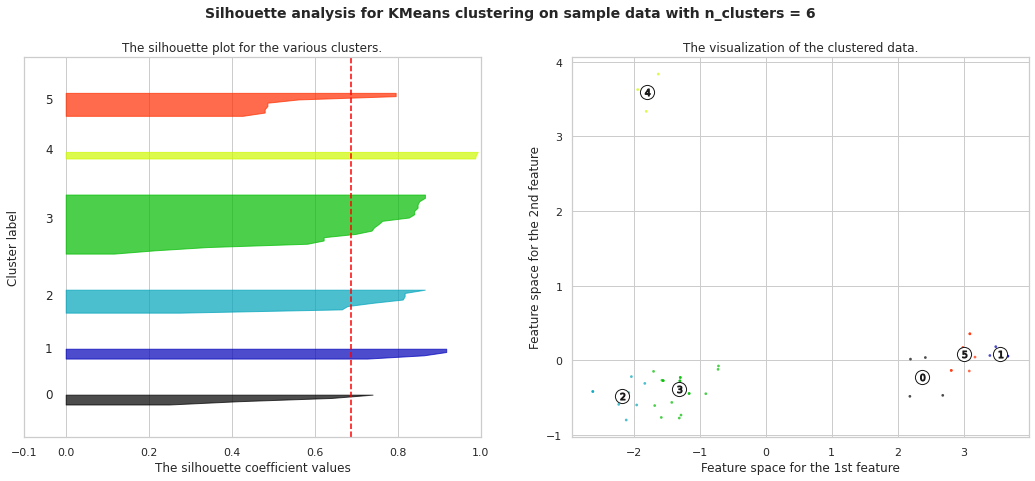

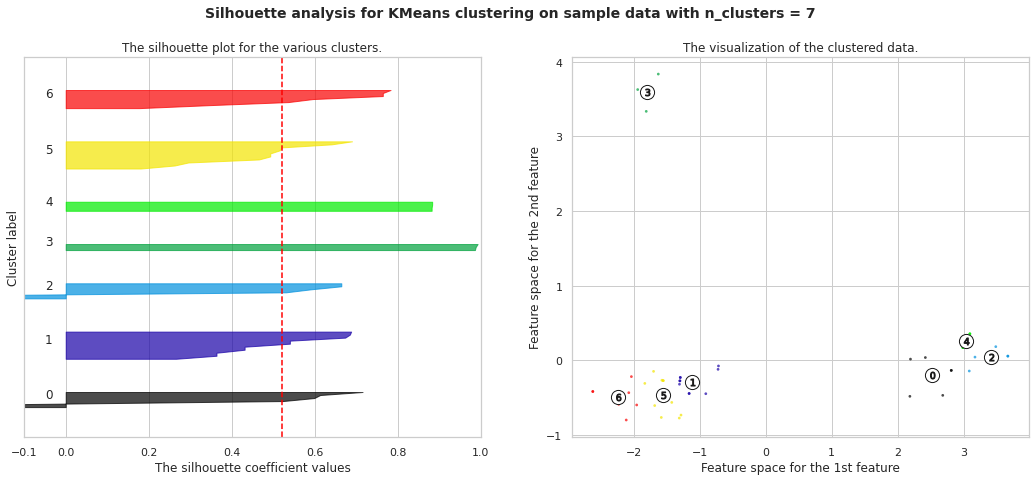

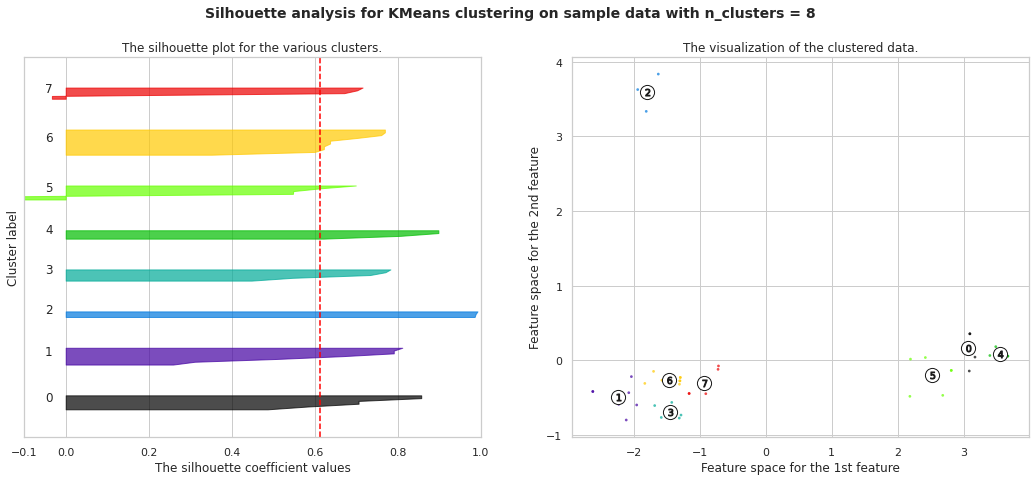

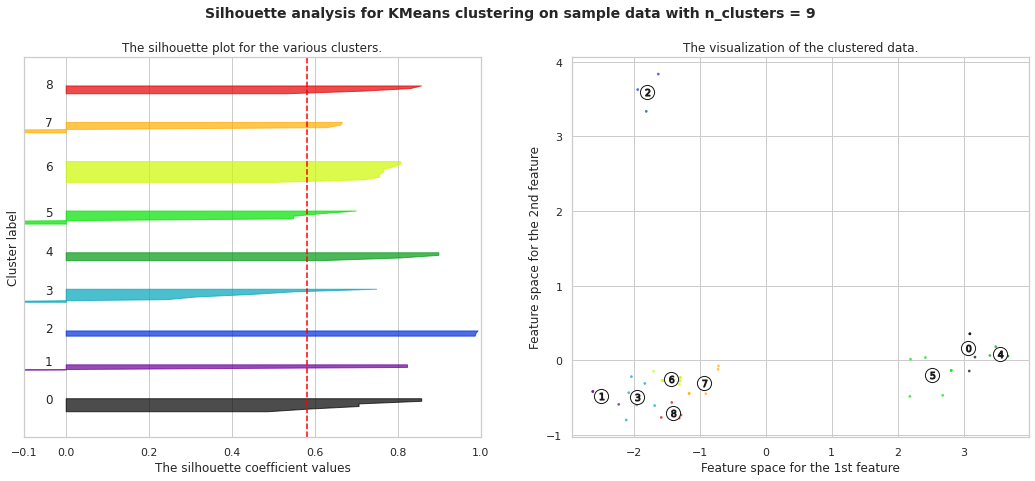

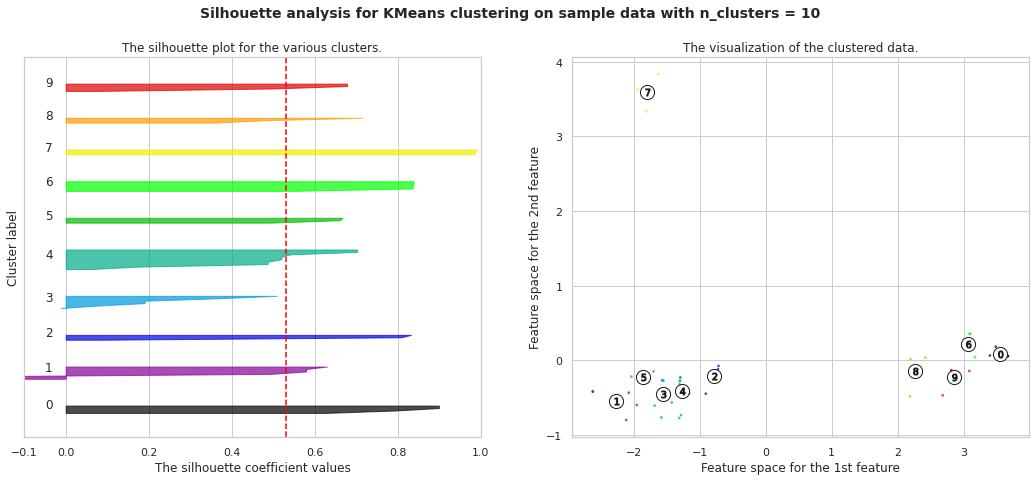

In [193]:
display_variants(work_pca, 10, kmeans_init='random')

## Análisis de clusters

In [198]:
data_selected.shape

(46, 12)

In [199]:
data_selected.columns

Index(['id', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'puntaje', 'nota',
       'categoria'],
      dtype='object')

In [196]:
pd.DataFrame(model_kx.y_predict)

,0
0,1
1,1
2,0
3,0
4,0
5,1
6,0
7,1
8,0
9,1


## Guardar resultados